In [19]:
import csv
import glob
import cv2
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

@dataclass
class DrivingLog:
    center: int = 0
    left: int = 1
    right: int = 2
    steering_angle: int = 3
    throttle: int = 4
    brake: int = 5
    speed: int = 6

images = []
steering_angles = []
files = glob.glob('./jData/Lap1/driving_log.csv')
for file in files:
    print(file)
    with open(file) as csv_file:
        reader = csv.reader(csv_file)
        for line in reader:
            steering_angle = float(line[DrivingLog.steering_angle])
            inverse_steering_angle = - float(line[DrivingLog.steering_angle])
            for i in range(1):
                img_name = line[i].split('/')[-1]
                old_dir = file.split('/')[2]
                img_path = f'./jData/{old_dir}/IMG/{img_name}'
                img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
                inv_img = cv2.flip(src=img, flipCode=1)
                images.append(img)
                steering_angles.append(steering_angle)
#                 steering_angles.append(steering_angle + (i * 0.15))
                images.append(inv_img)
                steering_angles.append(inverse_steering_angle)
#                 steering_angles.append(inverse_steering_angle - (i * 0.15))

print(len(images))
print(len(steering_angles))

X_train = np.array(images)
y_train = np.array(steering_angles)


./jData/Lap1/driving_log.csv
4144
4144
0
1


## Crop the image (30 from the bottom, 60 from the top)

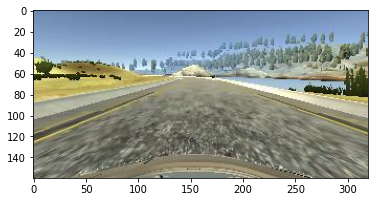

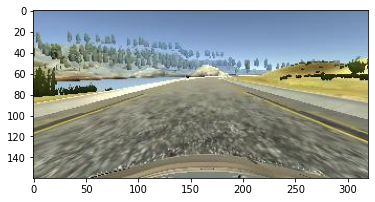

In [9]:
# X_train = X_train[:, 60:-20, :, :]
plt.figure()
plt.imshow(X_train[0])
plt.show()
plt.figure()
plt.imshow(X_train[1])
plt.show()

In [15]:
import tensorflow as tf
import keras

In [20]:

depth = 6
filter_size = 5

model = keras.models.Sequential()

# simple
# model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
# model.add(keras.layers.Dense(1))

# LeNet
# model.add(keras.layers.Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
# model.add(keras.layers.Convolution2D(depth, filter_size, filter_size, activation='relu'))
# model.add(keras.layers.MaxPooling2D())
# model.add(keras.layers.Convolution2D(depth, filter_size, filter_size,activation='relu'))
# model.add(keras.layers.MaxPooling2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(120))
# model.add(keras.layers.Dense(84))
# model.add(keras.layers.Dense(1))

# NVIDIA
model.add(keras.layers.Cropping2D(cropping=((60,20),(0,0)), input_shape=X_train.shape[1:]))
model.add(keras.layers.Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
model.add(keras.layers.Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
model.add(keras.layers.Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
model.add(keras.layers.Convolution2D(64,3,3,activation='relu'))
model.add(keras.layers.Convolution2D(64,3,3,activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.3, shuffle=True, nb_epoch=7)

# model.save('modelLeNetNoPreProc.h5')
model.save('modelNvidia2.h5')

/home/jfrancis/anaconda3/envs/BehavioralCloningProject/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
/home/jfrancis/anaconda3/envs/BehavioralCloningProject/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
/home/jfrancis/anaconda3/envs/BehavioralCloningProject/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
/home/jfrancis/anaconda3/envs/BehavioralCloningProject/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/home/jfrancis/anaconda3/envs/BehavioralCloningProject/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning

Train on 2900 samples, validate on 1244 samples
Epoch 1/7
2900/2900 [==============================] - 19s - loss: 770.8429 - val_loss: 0.0299
Epoch 2/7
2900/2900 [==============================] - 19s - loss: 0.0116 - val_loss: 0.0287
Epoch 3/7
2900/2900 [==============================] - 19s - loss: 0.0099 - val_loss: 0.0275
Epoch 4/7
2900/2900 [==============================] - 19s - loss: 0.0086 - val_loss: 0.0271
Epoch 5/7
2900/2900 [==============================] - 19s - loss: 0.0074 - val_loss: 0.0274
Epoch 6/7
2900/2900 [==============================] - 19s - loss: 0.0070 - val_loss: 0.0268
Epoch 7/7
2900/2900 [==============================] - 20s - loss: 0.0063 - val_loss: 0.0271


## Visualizing Loss

In [6]:
# history_object = model.fit_generator(train_generator, samples_per_epoch =
#     len(train_samples), validation_data = 
#     validation_generator,
#     nb_val_samples = len(validation_samples), 
#     nb_epoch=5, verbose=1)

# ### print the keys contained in the history object
# print(history_object.history.keys())

# ### plot the training and validation loss for each epoch
# plt.plot(history_object.history['loss'])
# plt.plot(history_object.history['val_loss'])
# plt.title('model mean squared error loss')
# plt.ylabel('mean squared error loss')
# plt.xlabel('epoch')
# plt.legend(['training set', 'validation set'], loc='upper right')
# plt.show()


NameError: name 'train_generator' is not defined

## Using Generators

In [ ]:
# import os
# import csv

# samples = []
# with open('./driving_log.csv') as csvfile:
#     reader = csv.reader(csvfile)
#     for line in reader:
#         samples.append(line)

# from sklearn.model_selection import train_test_split
# train_samples, validation_samples = train_test_split(samples, test_size=0.2)

# import cv2
# import numpy as np
# import sklearn

# def generator(samples, batch_size=32):
#     num_samples = len(samples)
#     while 1: # Loop forever so the generator never terminates
#         shuffle(samples)
#         for offset in range(0, num_samples, batch_size):
#             batch_samples = samples[offset:offset+batch_size]

#             images = []
#             angles = []
#             for batch_sample in batch_samples:
#                 name = './IMG/'+batch_sample[0].split('/')[-1]
#                 center_image = cv2.imread(name)
#                 center_angle = float(batch_sample[3])
#                 images.append(center_image)
#                 angles.append(center_angle)

#             # trim image to only see section with road
#             X_train = np.array(images)
#             y_train = np.array(angles)
#             yield sklearn.utils.shuffle(X_train, y_train)

# # Set our batch size
# batch_size=32

# # compile and train the model using the generator function
# train_generator = generator(train_samples, batch_size=batch_size)
# validation_generator = generator(validation_samples, batch_size=batch_size)

# ch, row, col = 3, 80, 320  # Trimmed image format

# model = Sequential()
# # Preprocess incoming data, centered around zero with small standard deviation 
# model.add(Lambda(lambda x: x/127.5 - 1.,
#         input_shape=(ch, row, col),
#         output_shape=(ch, row, col)))
# model.add(... finish defining the rest of your model architecture here ...)

# model.compile(loss='mse', optimizer='adam')
# model.fit_generator(train_generator, /
#             steps_per_epoch=ceil(len(train_samples)/batch_size), /
#             validation_data=validation_generator, /
#             validation_steps=ceil(len(validation_samples)/batch_size), /
#             epochs=5, verbose=1)